# 2017 Stack Overflow Data Exploration

# Step 1: Business Understanding

## Questions of Interest

This notebook explores responses to a 2017 StackOverFlow survey. As I looked through the main survey results, three questions stood out to me:

#### 1. Of people who are employeed full time, which type of companies allow the most fully remote work?
#### 2. For full time employees, does years of experience matter for remote jobs?
#### 3. How does job satisfction of full time remote employees compare to that of employees who go onsite?

# Step 2: Data Understanding

## Preprocesssing Steps

The below cell loads in the required libaries for this project. It also enable plots to be shown in this Jupyter Notebook and sets the number of visable lines when viewing dataframes

In [32]:
#import necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#show plots in Jupyter
%matplotlib inline
pd.set_option('display.max_columns', None)

#set number of visable rows
pd.set_option('display.max_rows', 50)

## Loading Data

The below cell reads in the datasets for this project, a main survey results file, and a survey results schema file that describes the survey itself.

In [33]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

## Exploring Data

The following cells explore both datasets and ties the main survey results to survey schema

Here I loaded the first 5 rows of data for the main survey results so that I could see how the survey responses were represented

In [34]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

The survey containes 51392 rows and 154 columns

In [35]:
df.shape

(51392, 154)

Below I calculated statistics for the quantatative responses to the survey

In [36]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


# Step 3: Data Preparation

Here I checked to see which survey querstions had missing responses. 

In [37]:
df_null = np.sum(df.isnull())
df_null

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

Since I know that I'm only interested in responses from people who are employeed full time and work remote I also checked to see what survey questions had null values for that filtered dataset

In [68]:
df_fulltime = df[df['EmploymentStatus'] == "Employed full-time"]
df_ftremote = df_fulltime[df_fulltime['HomeRemote'] == "All or almost all the time (I'm full-time remote)"]
df_ftremote.columns[df_ftremote.isna().any()].tolist()

['MajorUndergrad',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 'AssessJobLeader

I will check to make sure there are no missing responses for additional filtering as I move through my analysis.

## Understanding Relevant Survey Questions

To begin to explore the above questions, I first had to understand what the survey asked for several key questions. The following function gets the survey question from the column name in the results dataset

In [39]:
#function to pull out question details from the schema dataset
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

### _Remote Work_

I first took a look at the remote work survey question:

In [40]:
get_description('HomeRemote')

'How often do you work from home or remotely?'

The survey responses were as follows:

In [41]:
remote_counts = df.HomeRemote.value_counts()
remote_counts

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

### _Employment Status_

I then used the function to check the survey question for the employment status column in the survey results dataset:

In [42]:
get_description('EmploymentStatus')

'Which of the following best describes your current employment status?'

The survey responses were as follows:

In [43]:
employment_counts = df.EmploymentStatus.value_counts()
employment_counts

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

### _Industries_

Next I checked the survey question for the Company Type column in the survey results dataset:

In [44]:
get_description('CompanyType')

'Which of the following best describes the type of company or organization you work for?'

The survey responses were as follows:

In [45]:
industry_counts = df.CompanyType.value_counts()
industry_counts

Privately-held limited company, not in startup mode                      16709
Publicly-traded corporation                                               5871
I don't know                                                              3233
Sole proprietorship or partnership, not in startup mode                   2831
Government agency or public school/university                             2451
Venture-funded startup                                                    2387
I prefer not to answer                                                    1816
Pre-series A startup                                                      1288
Non-profit/non-governmental organization or private school/university     1225
State-owned company                                                        670
Something else                                                             342
Name: CompanyType, dtype: int64

### _Years of Experience_

Next I checked the survey question for the YearsCodedJob column in the survey results dataset:

In [46]:
get_description('YearsCodedJob')

'For how many years have you coded as part of your job?'

The survey responses were as follows:

In [47]:
prgmyears_counts = df.YearsCodedJob.value_counts()
prgmyears_counts

1 to 2 years        5289
2 to 3 years        4767
3 to 4 years        4003
4 to 5 years        3405
20 or more years    3067
Less than a year    3034
5 to 6 years        2990
9 to 10 years       1956
6 to 7 years        1912
10 to 11 years      1678
7 to 8 years        1638
8 to 9 years        1287
15 to 16 years       845
14 to 15 years       840
11 to 12 years       838
12 to 13 years       741
16 to 17 years       694
17 to 18 years       545
13 to 14 years       531
19 to 20 years       427
18 to 19 years       403
Name: YearsCodedJob, dtype: int64

### _Job Satisfaction_

Next I checked the surveyquestion for the JobSatisfaction column in the survey results dataset:

In [48]:
get_description('JobSatisfaction')

'Job satisfaction rating'

The survey responses were as follows:

In [49]:
satisfaction_counts = df.JobSatisfaction.value_counts()
satisfaction_counts

8.0     8983
7.0     7969
9.0     5573
6.0     4726
10.0    4148
5.0     3749
4.0     1865
3.0     1635
2.0      888
0.0      467
1.0      373
Name: JobSatisfaction, dtype: int64

Now that I understoof the survey questions and responses I was able to explore my main survey response questions:

# Step 4: Evaluation

# __1. Of people who are employeed full time, which type of companies allow the most fully remote work?__


In [50]:
#filter for fulltime employees
df_fulltime = df[df['EmploymentStatus'] == "Employed full-time"]
df_fulltime.shape

(36148, 154)

After checking how many responses there were by full time employees, I checked to see how many full time employees also respondedd that they worked full time remote:

In [51]:
#filter fulltime employees who work full time remote
df_ftremote = df_fulltime[df_fulltime['HomeRemote'] == "All or almost all the time (I'm full-time remote)"]
df_ftremote.shape

(2319, 154)

I then wanted to see what types of companies these full time, fully remote employees worked at. I calculated the percent that worked at each company type below:

In [52]:
#calcualte percentage of company types
remotecompanypercent = df_ftremote.CompanyType.value_counts(normalize = True)*100
remotecompanypercent

Privately-held limited company, not in startup mode                      42.659160
Publicly-traded corporation                                              12.039844
Venture-funded startup                                                   10.870507
Sole proprietorship or partnership, not in startup mode                   8.618450
I don't know                                                              7.968818
Pre-series A startup                                                      5.456908
I prefer not to answer                                                    3.811174
Non-profit/non-governmental organization or private school/university     3.291468
Government agency or public school/university                             2.944998
State-owned company                                                       1.299264
Something else                                                            1.039411
Name: CompanyType, dtype: float64

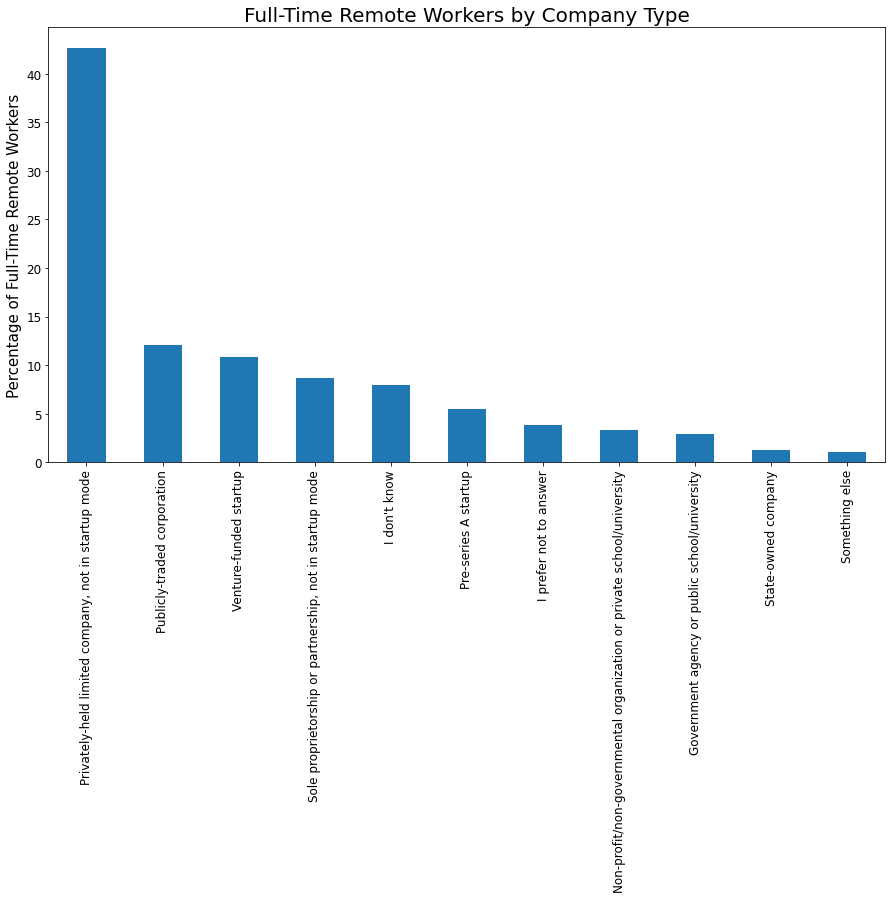

In [53]:
#plot percentage of compnay types
fig = remotecompanypercent.plot.bar(figsize = (15,8))
plt.title('Full-Time Remote Workers by Company Type', fontsize=20)
plt.ylabel('Percentage of Full-Time Remote Workers', fontsize=15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('Full-Time Remote Workers by Company Type');

The above graph shows that most full time, fully remote employees work at private companies that are not in start up mode. Very few full time, fully remote employees worked for government or state owned companies

# __2. For full time employees, does years of experience matter for remote jobs?__


My next main question explores the relationship between full time employees who work remote and how much expierience they had. To begin my exploration I calculated the percentage of full time employees whose response fell in each time bucket:

In [54]:
yearspercentall = df_fulltime.YearsCodedJob.value_counts(normalize = True)*100
yearspercentall

1 to 2 years        12.611865
2 to 3 years        11.951046
3 to 4 years        10.131571
4 to 5 years         8.563978
5 to 6 years         7.565341
Less than a year     6.913412
20 or more years     6.777100
6 to 7 years         4.853909
9 to 10 years        4.753156
7 to 8 years         4.243466
10 to 11 years       4.163456
8 to 9 years         3.250756
11 to 12 years       2.100990
15 to 16 years       1.982457
14 to 15 years       1.979494
12 to 13 years       1.831328
16 to 17 years       1.692052
17 to 18 years       1.339418
13 to 14 years       1.312748
19 to 20 years       1.034197
18 to 19 years       0.948261
Name: YearsCodedJob, dtype: float64

I then calculated the same metric for full time, fully remote employees

In [55]:
yearspercent = df_ftremote.YearsCodedJob.value_counts(normalize = True)*100
yearspercent

20 or more years    15.136133
1 to 2 years         7.798800
2 to 3 years         7.475773
5 to 6 years         7.106599
3 to 4 years         7.014305
4 to 5 years         6.598985
9 to 10 years        6.045224
10 to 11 years       5.122289
7 to 8 years         5.029995
6 to 7 years         4.107060
Less than a year     4.107060
8 to 9 years         3.507153
15 to 16 years       3.461006
11 to 12 years       2.814952
16 to 17 years       2.768805
14 to 15 years       2.722658
12 to 13 years       2.722658
17 to 18 years       2.076604
13 to 14 years       1.753576
18 to 19 years       1.384402
19 to 20 years       1.245962
Name: YearsCodedJob, dtype: float64

In order to compare the two metrics I needed to combine them into one daraframe. I also ordered the index to flow chronologically from the leas to most experience

In [56]:
years = pd.concat([yearspercent, yearspercentall], axis=1)
years.columns = ["Remote Workers","All Workers"]
years.reindex(["Less than a year", "1 to 2 years", "2 to 3 years","3 to 4 years",
               "4 to 5 years","5 to 6 years","6 to 7 years","7 to 8 years","8 to 9 years",
               "9 to 10 years","10 to 11 years","11 to 12 years","12 to 13 years","13 to 14 years",
               "14 to 15 years","15 to 16 years","16 to 17 years","17 to 18 years","18 to 19 years",
               "19 to 20 years","20 or more years"])

,Remote Workers,All Workers
Less than a year,4.107060,6.913412
1 to 2 years,7.798800,12.611865
2 to 3 years,7.475773,11.951046
3 to 4 years,7.014305,10.131571
4 to 5 years,6.598985,8.563978
5 to 6 years,7.106599,7.565341
6 to 7 years,4.107060,4.853909
7 to 8 years,5.029995,4.243466
8 to 9 years,3.507153,3.250756
9 to 10 years,6.045224,4.753156


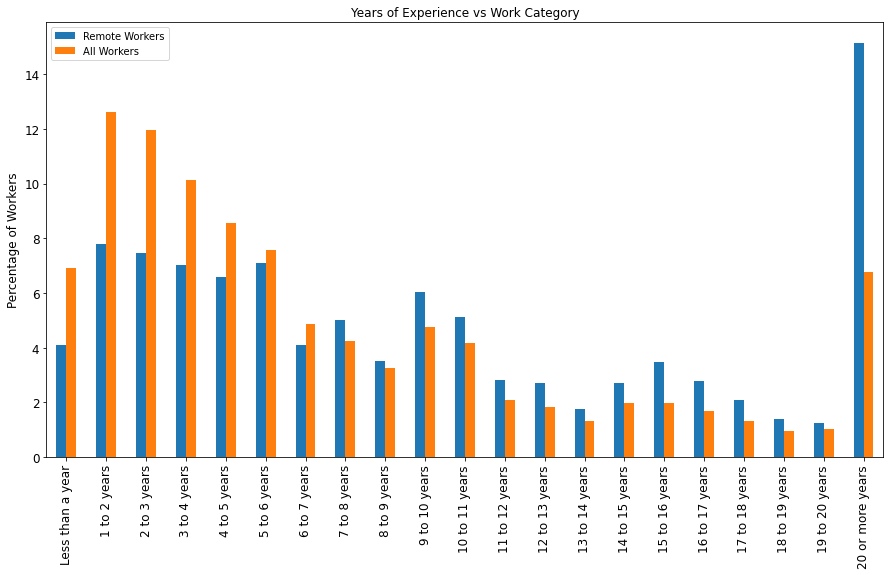

In [57]:
years.reindex(["Less than a year", 
               "1 to 2 years", 
               "2 to 3 years",
               "3 to 4 years",
               "4 to 5 years",
               "5 to 6 years",
               "6 to 7 years",
               "7 to 8 years",
               "8 to 9 years",
               "9 to 10 years",
               "10 to 11 years",
               "11 to 12 years",
               "12 to 13 years",
               "13 to 14 years",
               "14 to 15 years",
               "15 to 16 years",
               "16 to 17 years",
               "17 to 18 years",
               "18 to 19 years",
               "19 to 20 years",
               "20 or more years"]).plot(kind='bar',
            stacked=False,
            figsize = (15,8),
            title='Years of Experience vs Work Category')

plt.ylabel('Percentage of Workers', fontsize=12)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig("Experience of Remote Workers");

The above graph shows that most remote workers had 20+ years of coding. It is also noted that a signifigant amount of remote workers also appear to be early in their careers. 

# __3. How does job satisfction of full time remote employees compare to that of employees who go onsite?__

Finally, I wanted to explore the relationship between remote work and job satisfaction. To do this I first found the precentages of responses that fell in each of the 1-10 rating buckets for each of the remote question response types:

In [58]:
#A few days each month job satisfaction
df_few = df_fulltime[df_fulltime['HomeRemote'] == "A few days each month"]
few = df_few.JobSatisfaction.value_counts(normalize = True)*100
few = few.to_frame('Rarely Remote')
few

,Rarely Remote
8.0,23.597261
7.0,20.605745
9.0,14.778985
6.0,12.196755
10.0,9.331746
5.0,8.587587
4.0,4.286352
3.0,3.452895
2.0,1.741331
0.0,0.721834


In [59]:
#Never job satisfaction
df_never = df_fulltime[df_fulltime['HomeRemote'] == "Never"]
never = df_never.JobSatisfaction.value_counts(normalize = True)*100
never = never.to_frame('Never Remote')
never

,Never Remote
8.0,21.195883
7.0,19.749936
6.0,12.009866
9.0,11.805733
5.0,10.589436
10.0,7.893170
4.0,5.528621
3.0,5.035298
2.0,3.206600
0.0,1.684103


In [60]:
#full-time remote job satisfaction
df_full = df_fulltime[df_fulltime['HomeRemote'] == "All or almost all the time (I'm full-time remote)"]
full = df_full.JobSatisfaction.value_counts(normalize = True)*100
full = full.to_frame('Full Remote')
full

,Full Remote
8.0,21.590909
9.0,18.136364
10.0,17.045455
7.0,16.363636
6.0,9.681818
5.0,6.727273
3.0,3.545455
4.0,3.227273
2.0,1.500000
0.0,1.272727


In [61]:
#less than half job satisfaction
df_lesshalf = df_fulltime[df_fulltime['HomeRemote'] == "Less than half the time, but at least one day each week"]
lesshalf = df_lesshalf.JobSatisfaction.value_counts(normalize = True)*100
lesshalf = lesshalf.to_frame('Less Than Half Remote')
lesshalf

,Less Than Half Remote
8.0,22.797927
7.0,19.811033
9.0,15.909784
6.0,11.307528
10.0,10.423651
5.0,7.802499
4.0,4.876562
3.0,3.962207
2.0,1.737275
0.0,0.761963


In [62]:
#more than half job satisfaction
df_morehalf = df_fulltime[df_fulltime['HomeRemote'] == "More than half, but not all, the time"]
morehalf = df_morehalf.JobSatisfaction.value_counts(normalize = True)*100
morehalf = morehalf.to_frame('More Than Half Remote')
morehalf

,More Than Half Remote
8.0,22.141372
7.0,18.711019
9.0,13.617464
6.0,11.954262
10.0,10.810811
5.0,10.291060
3.0,4.469854
4.0,4.158004
2.0,2.182952
0.0,1.143451


In [63]:
#It's complicated job satisfaction
df_comp = df_fulltime[df_fulltime['HomeRemote'] == "It's complicated"]
comp = df_comp.JobSatisfaction.value_counts(normalize = True)*100
comp = comp.to_frame('Its Complicated')
comp

,Its Complicated
8.0,24.681934
7.0,19.465649
6.0,12.913486
9.0,11.895674
5.0,8.715013
10.0,8.142494
4.0,5.279898
3.0,4.198473
2.0,2.671756
0.0,1.272265


In [64]:
#half job satisfaction
df_half = df_fulltime[df_fulltime['HomeRemote'] == "About half the time"]
half = df_half.JobSatisfaction.value_counts(normalize = True)*100
half = half.to_frame('Half Remote')
half

,Half Remote
7.0,21.079958
8.0,19.522326
10.0,12.668744
6.0,12.149533
9.0,12.149533
5.0,10.384216
4.0,4.465213
3.0,3.011423
1.0,1.661475
2.0,1.557632


I then joined all of the response satisfactions together in one dataframe

In [65]:
satisfaction = pd.concat((never, few, lesshalf, half, morehalf, comp, full),axis=1, sort=False)
satisfaction

,Never Remote,Rarely Remote,Less Than Half Remote,Half Remote,More Than Half Remote,Its Complicated,Full Remote
0.0,1.684103,0.721834,0.761963,1.349948,1.143451,1.272265,1.272727
1.0,1.301352,0.699509,0.609570,1.661475,0.519751,0.763359,0.909091
2.0,3.206600,1.741331,1.737275,1.557632,2.182952,2.671756,1.500000
3.0,5.035298,3.452895,3.962207,3.011423,4.469854,4.198473,3.545455
4.0,5.528621,4.286352,4.876562,4.465213,4.158004,5.279898,3.227273
5.0,10.589436,8.587587,7.802499,10.384216,10.291060,8.715013,6.727273
6.0,12.009866,12.196755,11.307528,12.149533,11.954262,12.913486,9.681818
7.0,19.749936,20.605745,19.811033,21.079958,18.711019,19.465649,16.363636
8.0,21.195883,23.597261,22.797927,19.522326,22.141372,24.681934,21.590909
9.0,11.805733,14.778985,15.909784,12.149533,13.617464,11.895674,18.136364


Finally, I graphed the response satisfactions together on one grap so that I could compare them.

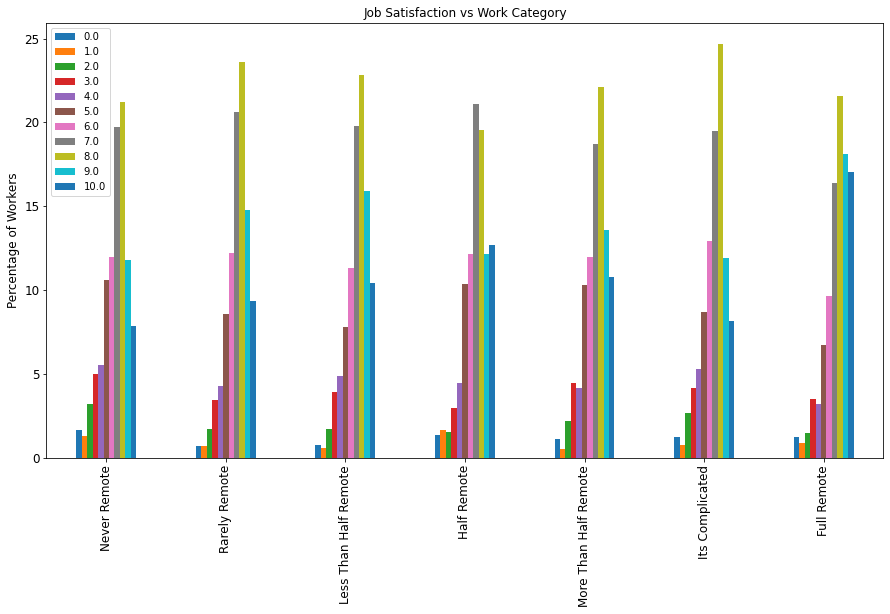

In [66]:
np.transpose(satisfaction).plot(kind='bar',
            stacked=False,
            figsize = (15,8),
            title='Job Satisfaction vs Work Category')

plt.ylabel('Percentage of Workers', fontsize=12)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.savefig('Job Satisfaction');

The data shows that most people were satisfied with their jobs, however remote workers scored their satisfaction higher than all other work types.